In [ ]:
import random
import time
import numpy as np
from matplotlib import pyplot as plt
import tkinter as tk   #Use tkinter for GUI
from PIL import Image, ImageTk  # Use PIL for image loading and manipulation

In [ ]:
class GridWorldGUI:
    """
    A graphical user interface (GUI) for a grid world environment where an agent navigates to collect an item
    and deliver it to a target location. The environment is visualized using tkinter.
    """
    def __init__(self, size=5, target_location=None):
        """
        Initialize the GridWorldGUI with a grid of the given size and set up the GUI elements.

        Args:
            size (int): The size of the grid (default is 5).
            target_location (tuple): The target position in the grid (default is the bottom-right corner).
        """
        self.size = size
        self.agent_position = self.random_position()
        self.item_position = self.random_position()
        self.target_position = target_location if target_location else (size - 1, size - 1)
        self.has_item = False
        self.time_taken = 0
        self.steps = 0
        self.block_cells={} # Dictionary to store blocked cells (unused in current code)
        self.time_taken = 0
        self.best_steps = float('inf')
        self.best_time = float('inf')
        # Create the tkinter window and canvas
        self.window = tk.Tk()
        self.window.title("Grid World")
        self.canvas = tk.Canvas(self.window, width=400, height=400)
        self.canvas.pack()
        self.cell_size = 400 // self.size
        self.min_steps="null"
        self.episodes=0

        # Create the tkinter window and canvas
        self.agent_img = ImageTk.PhotoImage(Image.open("icon/agent.png").resize((self.cell_size, self.cell_size)))
        self.item_img = ImageTk.PhotoImage(Image.open("icon/item.png").resize((self.cell_size, self.cell_size)))
        self.target_img = ImageTk.PhotoImage(Image.open("icon/target.png").resize((self.cell_size, self.cell_size)))

        # Labels for statistics
        self.episodes_label = tk.Label(self.window, text="current episode: 0")
        self.episodes_label.pack()
        self.steps_label = tk.Label(self.window, text="Steps: 0")
        self.steps_label.pack()
        self.time_label = tk.Label(self.window, text="Time: 0.0s")
        self.time_label.pack()

        self.Min_steps_label = tk.Label(self.window, text="Optimal_steps = unknow")
        self.Min_steps_label.pack()

    def random_position(self):
        """
        Generate a random position within the grid.

        Returns:
            tuple: A random (x, y) position within the grid.
        """

        return (random.randint(0, self.size - 1), random.randint(0, self.size - 1))

    def calculate_optimal_steps(self):
        """
        Calculate the optimal number of steps required for the agent to collect the item and reach the target.

        Returns:
            int: The minimum number of steps needed.
        """

        distance_agent_to_item = abs(self.agent_position[0] - self.item_position[0]) + abs(
            self.agent_position[1] - self.item_position[1])

        # Calculate the Manhattan distance from the item to the target
        distance_item_to_target = abs(self.item_position[0] - self.target_position[0]) + abs(
            self.item_position[1] - self.target_position[1])

        # The optimal steps are the sum of the two distances
        return distance_agent_to_item + distance_item_to_target

    def reset(self,debug=False):
        """
        Reset the environment by placing the agent and item in random positions and clearing previous state.

        Args:
            debug (bool): If True, the GUI is not updated after reset (default is False).

        Returns:
            tuple: The initial positions of the agent, item, and the has_item flag.
        """
        self.agent_position = self.random_position()
        self.item_position = self.random_position()
        self.has_item = False
        self.min_steps=self.calculate_optimal_steps()
        if not debug:
            self.update_gui()
        return self.agent_position, self.item_position, self.has_item

    def step(self, action,debug=False):
        """
        Execute a step in the environment based on the action provided, updating the agent's position.

        Args:
            action (str): The action to be taken by the agent ('north', 'south', 'west', 'east').
            debug (bool): If True, the GUI is not updated after the step (default is False).

        Returns:
            tuple: The new positions of the agent, item, has_item flag.
            int: The reward obtained for the action.
            bool: Whether the episode has ended.
        """
        x, y = self.agent_position

        if action == 'north' and y > 0:
            y -= 1
        elif action == 'south' and y < self.size - 1:
            y += 1
        elif action == 'west' and x > 0:
            x -= 1
        elif action == 'east' and x < self.size - 1:
            x += 1

        self.agent_position = (x, y)
#!!!!!!!!!!!!!!!!!!!!!!!reward structures!!!!!!!!!!!!!!!!!!!!!!!!!
        reward = -1
        done = False
        # Check if the agent has reached the item
        if self.agent_position == self.item_position and not self.has_item:
            self.has_item = True
            reward = 10

        # If the agent has the item, the item moves with the agent
        if self.has_item:
            self.item_position = self.agent_position
        # Check if the agent has reached the target with the item
        if self.agent_position == self.target_position and self.has_item:
            reward = 100
            done = True
        # if self.agent_position == self.target_position and not self.has_item:
        #     reward = -10

        if not debug:
            self.update_gui()
        return (self.agent_position, self.item_position, self.has_item), reward, done

#!!!!!!!!!!!!!!!!!!!!!!!reward structures!!!!!!!!!!!!!!!!!!!!!!!!!
    def update_gui(self):
        self.canvas.delete("all")
        for i in range(self.size):
            for j in range(self.size):
                x1 = i * self.cell_size
                y1 = j * self.cell_size
                x2 = x1 + self.cell_size
                y2 = y1 + self.cell_size
                self.canvas.create_rectangle(x1, y1, x2, y2, outline="black")

        # Place the target image
        self.canvas.create_image(self.target_position[0] * self.cell_size,
                                 self.target_position[1] * self.cell_size,
                                 anchor=tk.NW, image=self.target_img)

        # Place the item image
        # if not self.has_item: #not use
        self.canvas.create_image(self.item_position[0] * self.cell_size,
                                 self.item_position[1] * self.cell_size,
                                 anchor=tk.NW, image=self.item_img)

        # Place the agent image
        self.canvas.create_image(self.agent_position[0] * self.cell_size,
                                 self.agent_position[1] * self.cell_size,
                                 anchor=tk.NW, image=self.agent_img)

        if self.has_item:
            # Optionally, indicate that the agent is carrying the item
            self.canvas.create_text(self.agent_position[0] * self.cell_size + self.cell_size // 2,
                                    self.agent_position[1] * self.cell_size + self.cell_size // 2,
                                    text="", fill="white", font=("Arial", 24))
            # Update labels with the latest statistics
        self.steps_label.config(text=f"Steps: {self.steps}")
        self.time_label.config(text=f"Time: {self.time_taken:.2f}s")
        # self.best_record_label.config(text=f"Best Record: Steps = {self.best_steps}, Time = {self.best_time:.2f}s")
        self.Min_steps_label.config(text=f"optimal_steps = {self.min_steps}")
        self.episodes_label.config(text=f"current episode: {self.episodes}")

        self.window.update()

    def update_statistics(self, steps, time_taken):
        """
        Update the statistics such as steps taken and time taken for the current episode.

        Args:
            steps (int): The number of steps taken in the current episode.
            time_taken (float): The time taken in the current episode.
        """
        self.steps = steps
        self.time_taken = time_taken
        if steps < self.best_steps or (steps == self.best_steps and time_taken < self.best_time):
            self.best_steps = steps
            self.best_time = time_taken
        self.update_gui()

In [ ]:
class QLearningAgentGUI:
    """
    A Q-learning agent that interacts with the GridWorldGUI environment, learning the optimal policy to
    navigate the grid, collect an item, and reach the target.
    """

    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=0.05, delay=0):
        """
        Initialize the Q-learning agent with parameters for learning and exploration.

        Args:
            env (GridWorldGUI): The environment the agent interacts with.
            learning_rate (float): The learning rate (alpha) for updating Q-values (default is 0.1).
            discount_factor (float): The discount factor (gamma) for future rewards (default is 0.9).
            epsilon (float): The probability of choosing a random action (epsilon-greedy policy) (default is 0.05).
            delay (float): Time delay between actions for visualizing the agent's behavior (default is 0).
        """

        self.env = env
        self.q_table = {} # Dictionary to store Q-values for state-action pairs
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.actions = ['north', 'south', 'west', 'east']
        self.delay = delay  # Delay in seconds

        # Tracking successful episodes and steps
        self.successful_episodes = 0
        self.actual_steps = []
        self.optimal_steps = []


    def get_q_value(self, state, action):
        """
        Get the Q-value for a given state-action pair.

        Args:
            state (tuple): The current state (agent position, item position, has_item flag).
            action (str): The action taken by the agent.

        Returns:
            float: The Q-value for the state-action pair.
        """

        return self.q_table.get((state, action), 0.0)

    def update_q_value(self, state, action, reward, next_state):
        """
        Update the Q-value for a given state-action pair using the Q-learning update rule.

        Args:
            state (tuple): The current state.
            action (str): The action taken.
            reward (int): The reward received after taking the action.
            next_state (tuple): The state reached after taking the action.
        """
        best_next_action = max(self.actions, key=lambda a: self.get_q_value(next_state, a))
        best_next_q_value = self.get_q_value(next_state, best_next_action)
        current_q_value = self.get_q_value(state, action)

        new_q_value = current_q_value + self.learning_rate * (
            reward + self.discount_factor * best_next_q_value - current_q_value)
        #Q(S, A) = Q(S, A) + α (R + γ max Q(S′, a′) − Q(S, A))
        self.q_table[(state, action)] = new_q_value

    def choose_action(self, state):
        """
        Choose an action based on Q-Value. (We don't choose random action cause epsilon = 0)

        Args:
            state (tuple): The current state.

        Returns:
            str: The action chosen by the agent.
        """
        if random.random() < self.epsilon:
            return random.choice(self.actions) # Explore: random action
        else:
            # Exploit: choose the action with the highest Q-value
            max_q_value = float("-inf")
            best_action = None

            for action in self.actions:
                q_value = self.get_q_value(state, action)
                if q_value >= max_q_value:
                    max_q_value = q_value
                    best_action = action

            return best_action
            # return max(self.actions, key=lambda action: self.get_q_value(state, action))


    def train(self, episodes=1000,delay=0.1):
        """
        Train the agent by running it through multiple episodes and updating Q-values.

        Args:
            episodes (int): The number of episodes to train for (default is 1000).
            delay (float): Time delay between steps for visualization (default is 0.1).
        """
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            # time.sleep(10)
            # print("now we are at ",episode+1)
            start_time = time.time()
            steps = 0
            optimal_steps = self.env.calculate_optimal_steps()  # Calculate optimal steps
            self.env.episodes=episode+1

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                steps += 1
                time.sleep(delay)  # Add a delay between steps to slow down the visualization
                self.env.steps = steps
                self.env.time_taken = time.time()-start_time
                self.env.update_gui()
            # if self.env.agent_position == self.env.target_position and self.env.has_item:
            self.successful_episodes += 1  # Increment successful episodes counter
            self.actual_steps.append(steps)  # Store actual steps
            self.optimal_steps.append(optimal_steps)  # Store optimal steps
            total_time = time.time() - start_time
             # show the chart
            # self.visualize_steps_chart()

            self.env.update_statistics(steps, total_time)
        self.visualize_steps_chart()
        #Calculate the Manhattan distance from the agent to the item

    def visualize_steps_chart(self):
        # Plot the real vs. optimal steps over successful episodes
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, self.successful_episodes + 1), self.actual_steps, label="Actual Steps")
        plt.plot(range(1, self.successful_episodes + 1), self.optimal_steps, label="Optimal Steps", linestyle="--")
        plt.xlabel("Episodes")
        plt.ylabel("Steps")
        plt.title("Training Performance")
        plt.legend()
        plt.show()



In [ ]:
def test_agent(agent, episodes=5):
    """
    Test the trained agent by running it through several episodes and collecting statistics.

    Args:
        agent (QLearningAgentGUI): The trained Q-learning agent.
        episodes (int): The number of test episodes to run (default is 5).

    Returns:
        tuple: Average steps to collect the item, average steps in total.
    """
    steps_d_taken = []
    steps_t_taken = []
    for _ in range(episodes):
        state = agent.env.reset(debug=True)
        done = False
        steps = 0

        flag = False
        while not done:
            action = agent.choose_action(state)
            state, _, done = agent.env.step(action,debug=True)

            steps += 1
            # print(agent.env.has_item)
            if state[2] and not flag:  # Check if the agent has picked up the item
                # print(steps)

                flag = state[2]
                steps_t_taken.append(steps)
        steps_d_taken.append(steps)
    avg_d_steps = np.mean(steps_d_taken)
    avg_t_steps = np.mean(steps_t_taken)
    return  avg_d_steps, avg_t_steps


In [ ]:
env = GridWorldGUI(size=5)  # Instantiate the environment and agent
agent = QLearningAgentGUI(env)

warinning! it will take 10 mins to run this code

in test procedure, we run 5 times without update q value and choose random action, then count Average steps to item and Average steps in total
Average steps to item: 68.2
Average steps in total: 209.8
now train 100 times


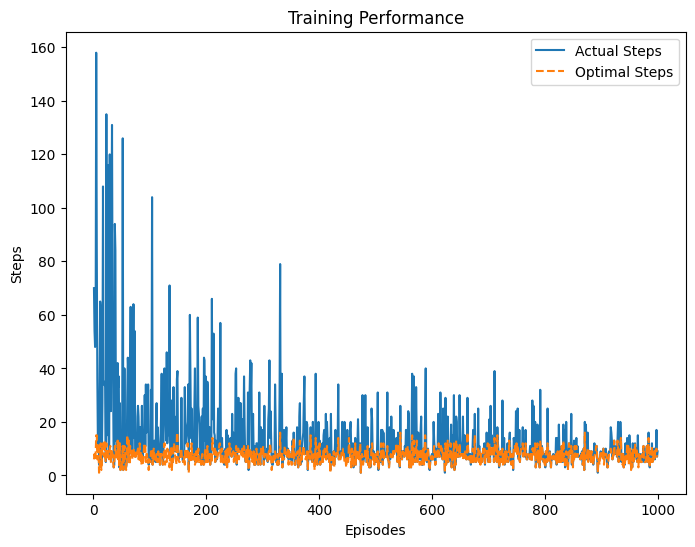

In [ ]:
# Test the agent before training
print("in test procedure, we run 5 times without update q value and choose random action, then count Average steps to item and Average steps in total")
agent.epsilon=1 #  set epsilon = 1 to make agent choose random action all the time
avg_d_steps, avg_t_steps = test_agent(agent)
print(f"Average steps to item: {avg_t_steps}")
print(f"Average steps in total: {avg_d_steps}")
print("now train 100 times")
# Train the agent
agent.epsilon=0.01 #  set epsilon = 0.01 to make agent is able to explore new path
agent.train(episodes=1000,delay=0)
env.window.mainloop()


You may need to close GUI window manually, then next cell will be run

In [ ]:
print("run another 5 times after trainnig update q value and choose MAX q_value action count Average steps to item and Average steps in total")

run another 5 times after trainnig update q value and choose MAX q_value action count Average steps to item and Average steps in total


In [ ]:
# Test the agent after training
avg_d_steps, avg_t_steps = test_agent(agent)
print(f"Average steps to item: {avg_t_steps}")
print(f"Average steps in total: {avg_d_steps}")
env.window.mainloop()

Average steps to item: 2.6
Average steps in total: 6.6


Result

Average steps to item and Average steps in total is less than the first try.

Decision-making process and insights

After executing Q-learning, our agent can retrieve the item and reach the target location faster than by taking random actions. Our decision-making model includes a 5% probability of ignoring the maximum Q-value and choosing a random action. This approach ensures that our agent can explore new paths while still finding the optimal path based on the learned Q-values with high probability.

Conclusion

This code implements a graphical user interface (GUI) application where a Q-learning agent is trained to navigate a grid world. The agent's objective is to find and collect an item within the grid and deliver it to a target location. Through repeated training and updating Q-values, the agent gradually learns the optimal actions to take in various states to complete the task with the fewest possible steps.

Specifically:

The GridWorldGUI class provides a visual representation of the grid environment, displaying the positions of the agent, item, and target, and updates the visualization in real-time as the agent takes actions.
The QLearningAgentGUI class implements a Q-learning agent that interacts with the environment, updating its strategy over time to become more efficient at completing the task.
Tests conducted before and after training demonstrate that the agent significantly improves its performance, as indicated by a reduction in the average number of steps required to complete the task.
This code illustrates the application of the Q-learning algorithm in a reinforcement learning task, with the added benefit of a GUI to visually observe the agent's learning process and decision-making improvements.